<a href="https://colab.research.google.com/github/Anurag-1A/DA-DS/blob/main/Exploratory_Data_Analysis_(Airbnb_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name:- Airbnb Booking Analysis**


##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary**


This project focuses on the exploratory data analysis (EDA) of Airbnb listings in New York City. The goal is to provide insights to help Airbnb hosts, property managers, and investors optimize their listings for improved occupancy rates and revenue.

The dataset includes significant number of Airbnb listings from across New York City, with attributes such as neighborhood group, price, room type, reviews, and availability. Key features like price and room type were used to identify trends and patterns in the Airbnb market.

The data was first cleaned to handle missing values,checked for duplicates and unique values. The essential features for analysis, such as neighborhood, price, and availability, were kept and last review column was dropped as it has missing values and wasn't necessary for our analysis. These steps ensured that the dataset was reliable for further analysis.

Exploratory Data Analysis (EDA)
The EDA aimed to uncover trends related to pricing, availability, and review counts etc and the analysis helped in understanding which neighborhoods and room types were more popular and successful. Some of the key insights observed were:


**BUSINESS CONTEXT**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

**BUSINESS OBJECTIVE**

The primary business objective of this exploratory data analysis is to help Airbnb hosts, property managers, and investors optimize their listings to improve occupancy rates, revenue, and overall performance.



In [124]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#load Dataset
filepath = '/content/Airbnb NYC 2019.csv'
read_airbnb_data = pd.read_csv(filepath)

#making a copy of the original dataset
df = read_airbnb_data.copy()

#Dataset at a glance
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [126]:
#Total count of rows and columsn in the dataset
df.shape

(48895, 16)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [128]:
# Check for total duplicated values in the dataset
len(df[df.duplicated()])

0

In [129]:
#Check for null/missing values in each column
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64



The dataset has 48,895 rows and 16 columns. There are no duplicate values in the dataset.

## ***Understanding the Variables***

In [130]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [131]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description


- id: A unique identifier assigned to each listing in the dataset.
- name: The title or name of the listing as it is displayed on Airbnb's platform.
- Host_id: A distinct identifier assigned to each host in the dataset.
- Host_name: The name of the host as shown on Airbnb’s website.
- Neighbourhood_group: A classification of neighborhoods within New York City, like Manhattan or Brooklyn.
- Neighbourhood: The exact neighborhood where the listing is located.
- Latitude: The geographical latitude coordinate of the listing.
- Longitude: The geographical longitude coordinate of the listing.
- Room_type: The category of accommodation being offered, such as an entire home, private room, or shared space.
- Price: The nightly rate for staying at the listing, in US dollars.
- Minimum_nights: The least number of nights required for a booking at the listing.
- Total_reviews: The cumulative number of reviews the listing has received.
- Reviews_per_month: The average number of reviews the listing gets each month.
- Host_listings_count: The total number of listings that a particular host has on Airbnb.
- Availability_365: The number of days in the upcoming 365-day period that the listing is available for reservation.

## ***Data Wrangling and Pre-processing***

In [132]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


In [133]:
#Handling column values
df['host_name'] = df['host_name'].fillna('N/A')
df['name'] = df['name'].fillna('N/A')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


#Dropping the last_review as we won't be utilizing it
df.drop(['last_review'],axis=1,inplace=True)


In [134]:
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [135]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


host_name
Sonder (NYC)         106929
Blueground            53824
Kara                  14679
Kazuya                10609
Sonder                 9216
Jeremy & Laura         9216
Corporate Housing      8281
Ken                    7645
Pranjal                4225
Mike                   2910
Name: calculated_host_listings_count, dtype: int64


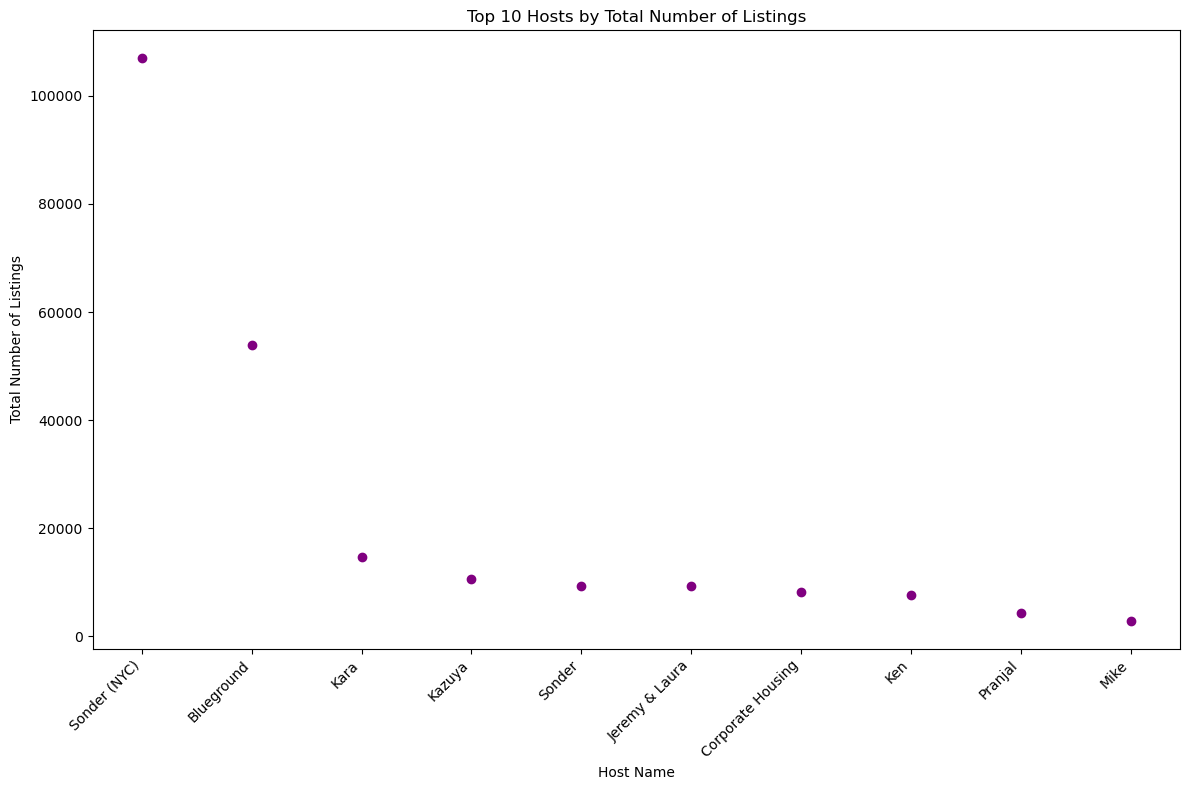

In [136]:
# Group by 'host_name' and sum the 'calculated_host_listings_count'
host_listings = df.groupby('host_name')['calculated_host_listings_count'].sum()

# Sort the results in descending order
top_hosts = host_listings.sort_values(ascending=False).head(10)

print(top_hosts)

# Plot the dot plot
plt.figure(figsize=(12, 8))
plt.scatter(top_hosts.index, top_hosts, color='purple')
plt.title('Top 10 Hosts by Total Number of Listings')
plt.xlabel('Host Name')
plt.ylabel('Total Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



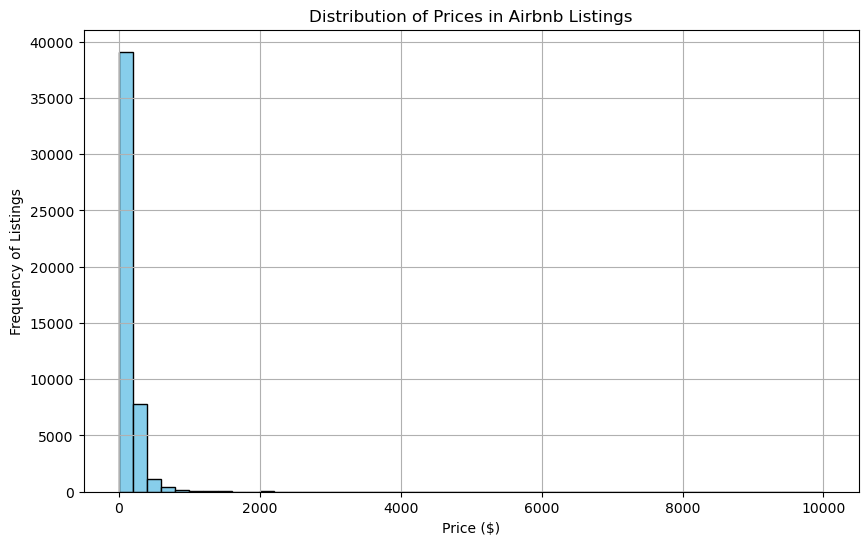

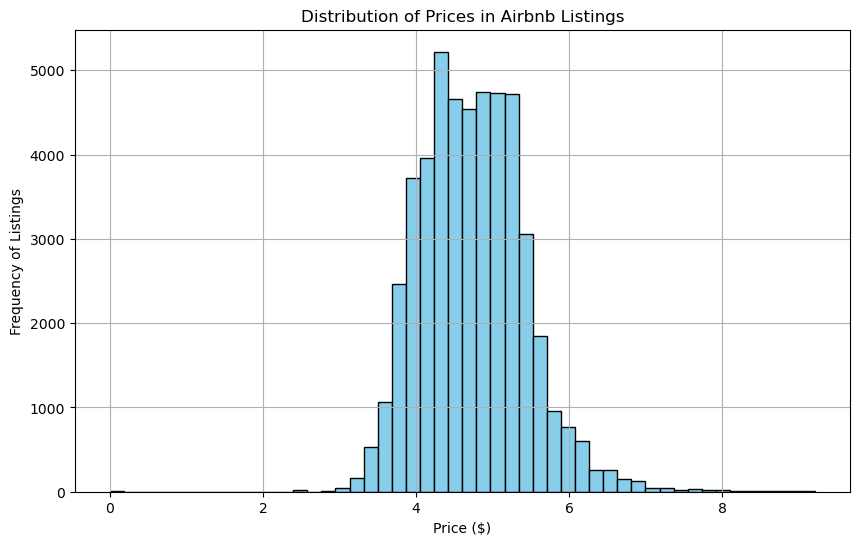

In [137]:
# Plotting a histogram of the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices in Airbnb Listings')
plt.xlabel('Price ($)')
plt.ylabel('Frequency of Listings')
plt.grid(True)
plt.show()

# Filtering out the top 1% price outliers
df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(10, 6))
plt.hist(df['log_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices in Airbnb Listings')
plt.xlabel('Price ($)')
plt.ylabel('Frequency of Listings')
plt.grid(True)
plt.show()

- >  From the above histogram, we can observe that as prices increase the number of listing decreases i.e. there are man listing around the $500 and below.

- > From the first histogram we figure out that the distribution is right skewed i.e. there are few listings with very high price pull
By applying a logarithimic scale on the frequency of listing we are trying to visualize the data on lesser frequency end.


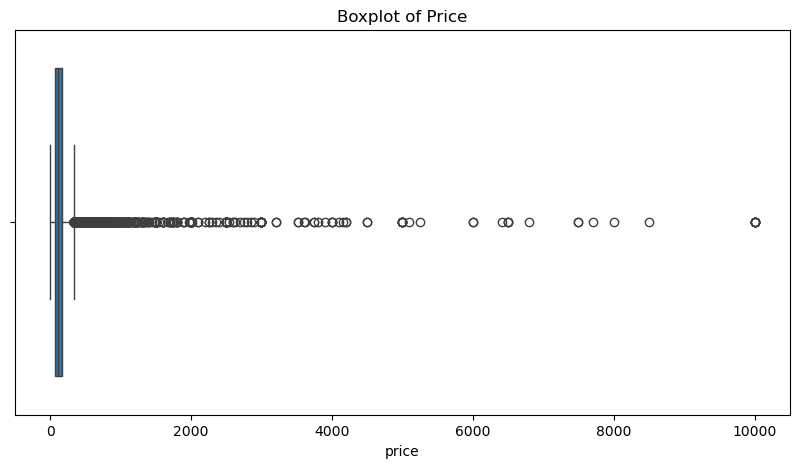

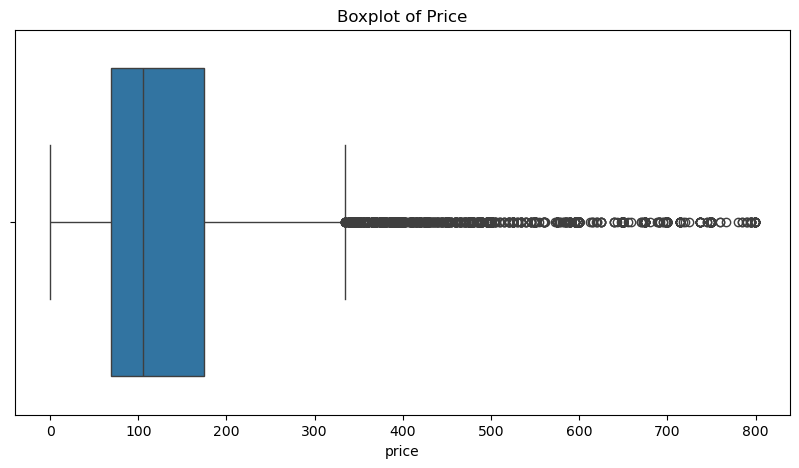

In [138]:
# Boxplot for price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

# Filter top 1% price outliers
# Define price threshold using percentile (e.g., 99th percentile)
threshold = df['price'].quantile(0.99)

# Filter out the top 1% most expensive listings
df_filtered = df[df['price'] <= threshold]


# Boxplot for price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_filtered['price'])
plt.title('Boxplot of Price')
plt.show()


In [148]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,4.736885
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.695344
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,4.248495
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,4.672829
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,5.170484
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,9.210440


In [147]:
df_filtered.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price
count,4.842100e+04,4.842100e+04,48421.000000,48421.000000,48421.000000,48421.000000,48421.000000,48421.000000,48421.000000,48421.000000,48421.000000
mean,1.901641e+07,6.757814e+07,40.728906,-73.951928,137.543917,6.979596,23.415130,1.096826,7.179199,112.096198,4.712540
std,1.097331e+07,7.854980e+07,0.054619,0.046163,103.789003,20.291590,44.699315,1.601144,33.090786,131.253201,0.651054
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.476774e+06,7.825587e+06,40.689960,-73.982840,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,4.248495
50%,1.967610e+07,3.083601e+07,40.722900,-73.955480,105.000000,3.000000,5.000000,0.380000,1.000000,44.000000,4.663439
75%,2.913231e+07,1.074344e+08,40.763150,-73.935950,175.000000,5.000000,24.000000,1.600000,2.000000,224.000000,5.170484
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,799.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,6.684612


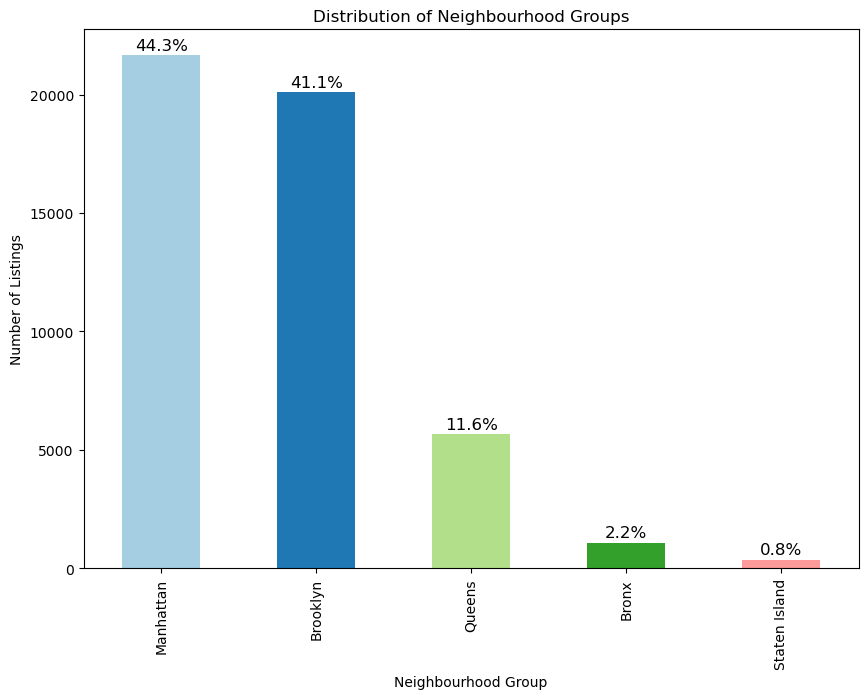

In [139]:

# Count the occurrences of each neighbourhood group
neighbourhood_counts = df['neighbourhood_group'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 7))
neighbourhood_counts.plot(kind='bar', color=plt.cm.Paired.colors)

# Add labels and title
plt.title('Distribution of Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')

# Add percentage labels on top of each bar
for i, count in enumerate(neighbourhood_counts):
    plt.text(i, count + (0.01 * max(neighbourhood_counts)), #0.01 * max(neighbourhood_counts) calculates 1% of the maximum value of neighbourhood_counts and adds this as extra space above each bar
             f'{count / neighbourhood_counts.sum() * 100:.1f}%', ha='center', fontsize=12)

# Show the plot
plt.show()


- > The bar chart helps to identify and visualise the total number of listing individually for each neighbourhood. It indicates that Manhattan and Brooklyn are the most sought-after neighborhoods, followed  by Queens.

- > In contrast, Staten Island and the Bronx together hosts only 3% of the total listed properties and have the fewest listings.

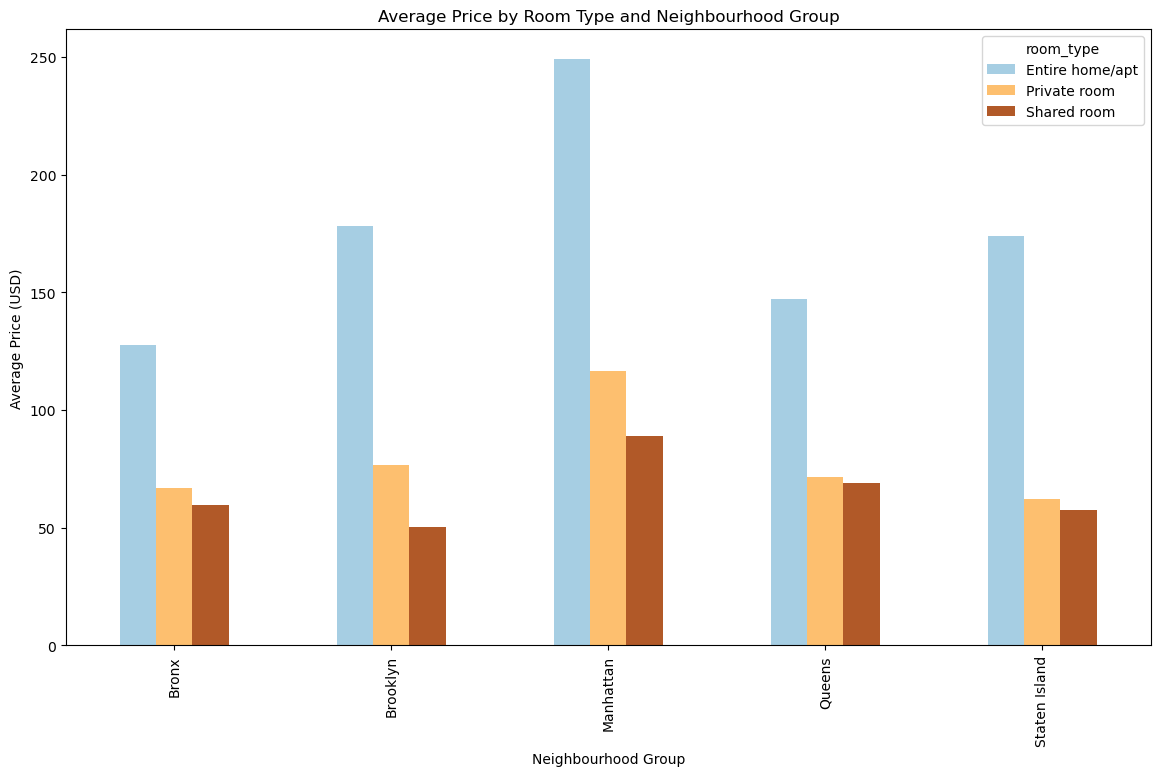

In [140]:
avg_prices = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

# Plot the grouped bar chart
avg_prices.plot(kind='bar', figsize=(14, 8), colormap='Paired')

# Add labels and title
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price (USD)')

# Show the plot
plt.show()

 By using a multiple bar chart we are trying to visuzlise the relationship between two categorical variables (neighborhood_group and room_type) and a numerical value (average price) in a clear and visually appealing manner.
### **Key Observations**
 - Entire home/apt consistently commands the highest average price across all neighborhoods.
 - Shared room has the lowest average price, making it the most affordable in every neighborhood.
 - The price gap between room types is most apparent in Manhattan, indicating a higher premium for private and entire home/apt accommodations in this neighborhood.
 - Bronx is the suitable option for those people who are looking for large spaces(aparment/home) with low budgets.

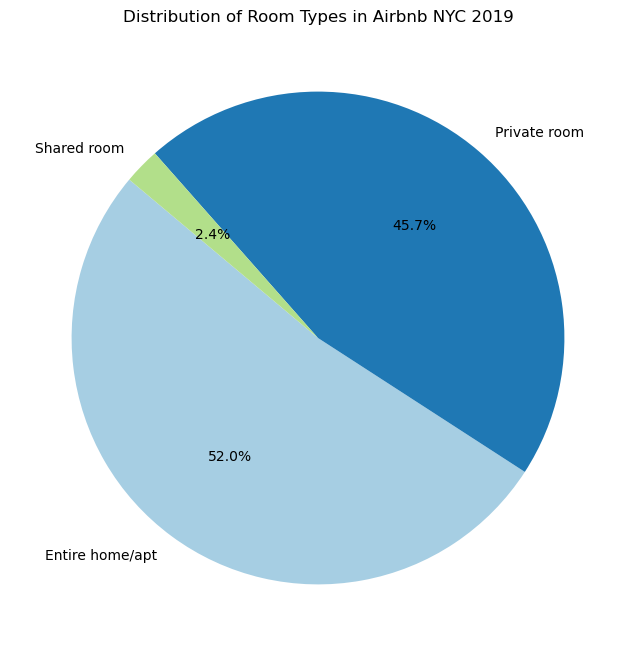

In [141]:
#Calculates the total count for each room type
room_type_counts = df['room_type'].value_counts()

#pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Room Types in Airbnb NYC 2019')
plt.show()

The above pie chart shows the distribution of different types of room present in our dataset. This helps in visualising the proportion of each room type, providing an easy-to-understand overview of how these types are distributed. ​

 - > The majority of listings are for "Entire home/apartment" constituting 52.0% of the total listing.
 - > The most prevalent room type on Airbnb NYC in 2019 was "Entire home/apt," accounting for 52% of the market.
 - > Shared room" was the least common room type, representing only 2.4% of the listings.

Listing of "Entire home/apartment" suggests a strong preference among Airbnb hosts offering their entire properties which can be used to analyse an increasing demand for such listing around NYC.

          Category Neighbourhood Group  Average Price (USD)
0   Most Expensive           Manhattan           196.875814
1  Least Expensive               Bronx            87.496792


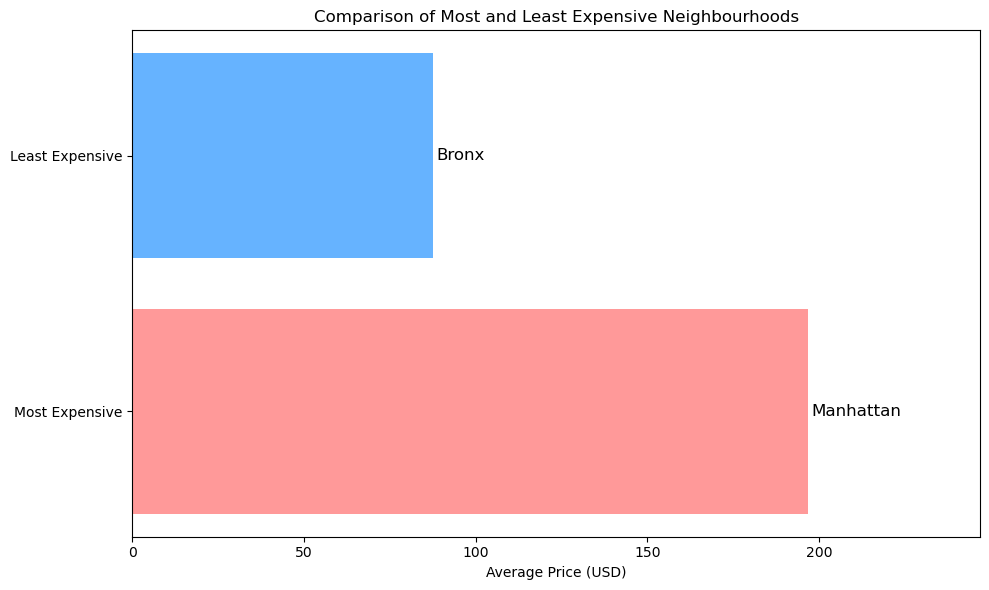

In [142]:
avg_prices = df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Find the most expensive and least expensive neighbourhoods
most_expensive = avg_prices.loc[avg_prices['price'].idxmax()]
least_expensive = avg_prices.loc[avg_prices['price'].idxmin()]

# Combine the results into a single DataFrame
expensive_neighbourhoods = pd.DataFrame({
    'Neighbourhood Group': [most_expensive['neighbourhood_group'], least_expensive['neighbourhood_group']],
    'Average Price (USD)': [most_expensive['price'], least_expensive['price']]
}, index=['Most Expensive', 'Least Expensive'])

# Reset index to use it for plotting
expensive_neighbourhoods = expensive_neighbourhoods.reset_index().rename(columns={'index': 'Category'})

print(expensive_neighbourhoods)

# Plotting
plt.figure(figsize=(10, 6))
colors = ['#ff9999','#66b3ff']  # Define colors for the bars

# Create horizontal bar chart
plt.barh(expensive_neighbourhoods['Category'], expensive_neighbourhoods['Average Price (USD)'], color=colors)

# Add text labels showing the Neighbourhood Group next to the bars
for i, (avg_price, neighbourhood) in enumerate(zip(expensive_neighbourhoods['Average Price (USD)'], expensive_neighbourhoods['Neighbourhood Group'])):
    plt.text(avg_price + 1, i, f"{neighbourhood}", va='center', fontsize=12)

# Adding labels and title for the chart
plt.xlabel('Average Price (USD)')
plt.title('Comparison of Most and Least Expensive Neighbourhoods')


plt.xlim(0, expensive_neighbourhoods['Average Price (USD)'].max() + 50)  # Adding some extra space on x-axis
plt.tight_layout()

# Show the plot
plt.show()

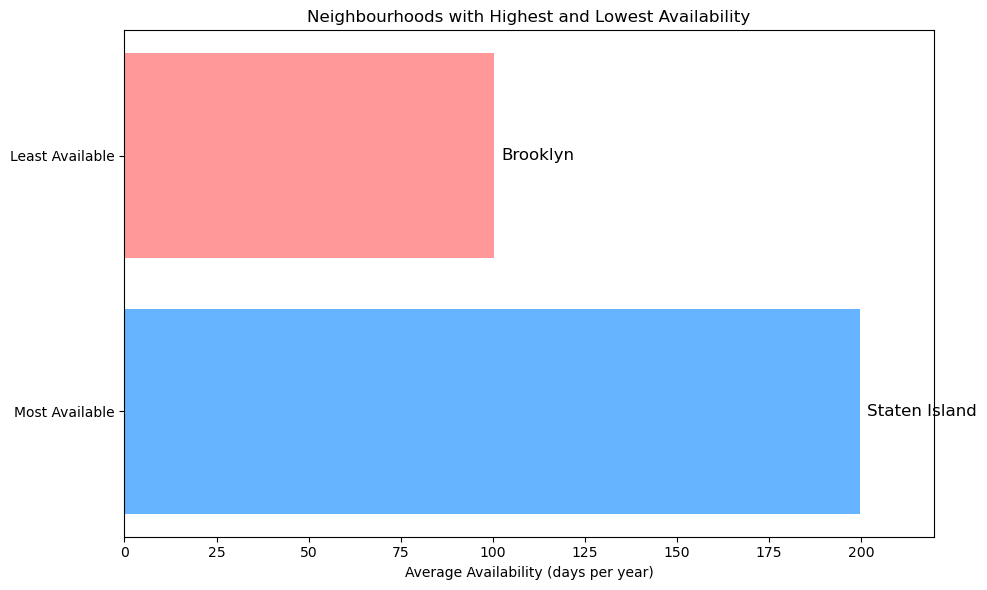

In [143]:
avg_availability = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

# Neighbourhoods with the highest and lowest availability
most_available = avg_availability.loc[avg_availability['availability_365'].idxmax()]
least_available = avg_availability.loc[avg_availability['availability_365'].idxmin()]

# Combining the results into a single DataFrame
availability_neighbourhoods = pd.DataFrame({
    'Neighbourhood Group': [most_available['neighbourhood_group'], least_available['neighbourhood_group']],
    'Average Availability (days per year)': [most_available['availability_365'], least_available['availability_365']]
}, index=['Most Available', 'Least Available'])

# Resetting index for plotting
availability_neighbourhoods = availability_neighbourhoods.reset_index().rename(columns={'index': 'Category'})

# Plot the chart
plt.figure(figsize=(10, 6))
colors = ['#66b3ff','#ff9999']  # colors used for the bars

# Creatting horizontal bar chart
plt.barh(availability_neighbourhoods['Category'], availability_neighbourhoods['Average Availability (days per year)'], color=colors)

# Adding text labels showing the Neighbourhood Group name on top/next to the bars
for i, (avg_availability, neighbourhood) in enumerate(zip(availability_neighbourhoods['Average Availability (days per year)'], availability_neighbourhoods['Neighbourhood Group'])):
    plt.text(avg_availability + 2, i, f"{neighbourhood}", va='center', fontsize=12)

# Add labels and title
plt.xlabel('Average Availability (days per year)')
plt.title('Neighbourhoods with Highest and Lowest Availability')

# Adjust layout for better appearance
plt.xlim(0, availability_neighbourhoods['Average Availability (days per year)'].max() + 20)  # Add some space on x-axis
plt.tight_layout()

# Show the plot
plt.show()


- Staten Island has the highest average availability, with listings being available for around 200 days per year.

- Brooklyn has the lowest availability, with listings available for fewer than 100 days per year clearly indicating a higher demand for accommodations in this particular neighbourhood.

In [144]:

# Existing code to get most and least available neighborhood groups
avg_availability = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()
most_available = avg_availability.loc[avg_availability['availability_365'].idxmax()]
least_available = avg_availability.loc[avg_availability['availability_365'].idxmin()]

# Get the top 5 listings with the highest and lowest availability in these neighborhoods
top_neigh_groups = [most_available['neighbourhood_group'], least_available['neighbourhood_group']]

# Filter data for these neighborhoods
filtered_df = df[df['neighbourhood_group'].isin(top_neigh_groups)]

# Get top 5 listings with highest availability
top_5_highest = filtered_df[filtered_df['neighbourhood_group'] == most_available['neighbourhood_group']].nlargest(5, 'availability_365')
# Get top 5 listings with lowest availability
top_5_lowest = filtered_df[filtered_df['neighbourhood_group'] == least_available['neighbourhood_group']].nsmallest(5, 'availability_365')


top_5_highest['Category'] = 'Top 5 Highest Availability'
top_5_lowest['Category'] = 'Top 5 Lowest Availability'

# Display the top 5 listings
print(top_5_highest[['neighbourhood_group', 'availability_365', 'price', 'Category']])

print("\n",top_5_lowest[['neighbourhood_group', 'availability_365', 'price', 'Category']])


      neighbourhood_group  availability_365  price                    Category
2282        Staten Island               365    190  Top 5 Highest Availability
9345        Staten Island               365     45  Top 5 Highest Availability
15278       Staten Island               365    100  Top 5 Highest Availability
18563       Staten Island               365    200  Top 5 Highest Availability
23827       Staten Island               365    200  Top 5 Highest Availability

    neighbourhood_group  availability_365  price                   Category
6             Brooklyn                 0     60  Top 5 Lowest Availability
20            Brooklyn                 0    299  Top 5 Lowest Availability
48            Brooklyn                 0    115  Top 5 Lowest Availability
66            Brooklyn                 0    225  Top 5 Lowest Availability
94            Brooklyn                 0    100  Top 5 Lowest Availability


room_type            Entire home/apt  Private room  Shared room  Total Average
neighbourhood_group                                                           
Bronx                       1.824749      1.319371     0.968833       4.112954
Brooklyn                    1.125341      0.990650     0.752010       2.868001
Manhattan                   0.862068      1.145254     1.329646       3.336968
Queens                      1.635038      1.548200     1.169091       4.352329
Staten Island               1.767955      1.437074     0.740000       3.945029


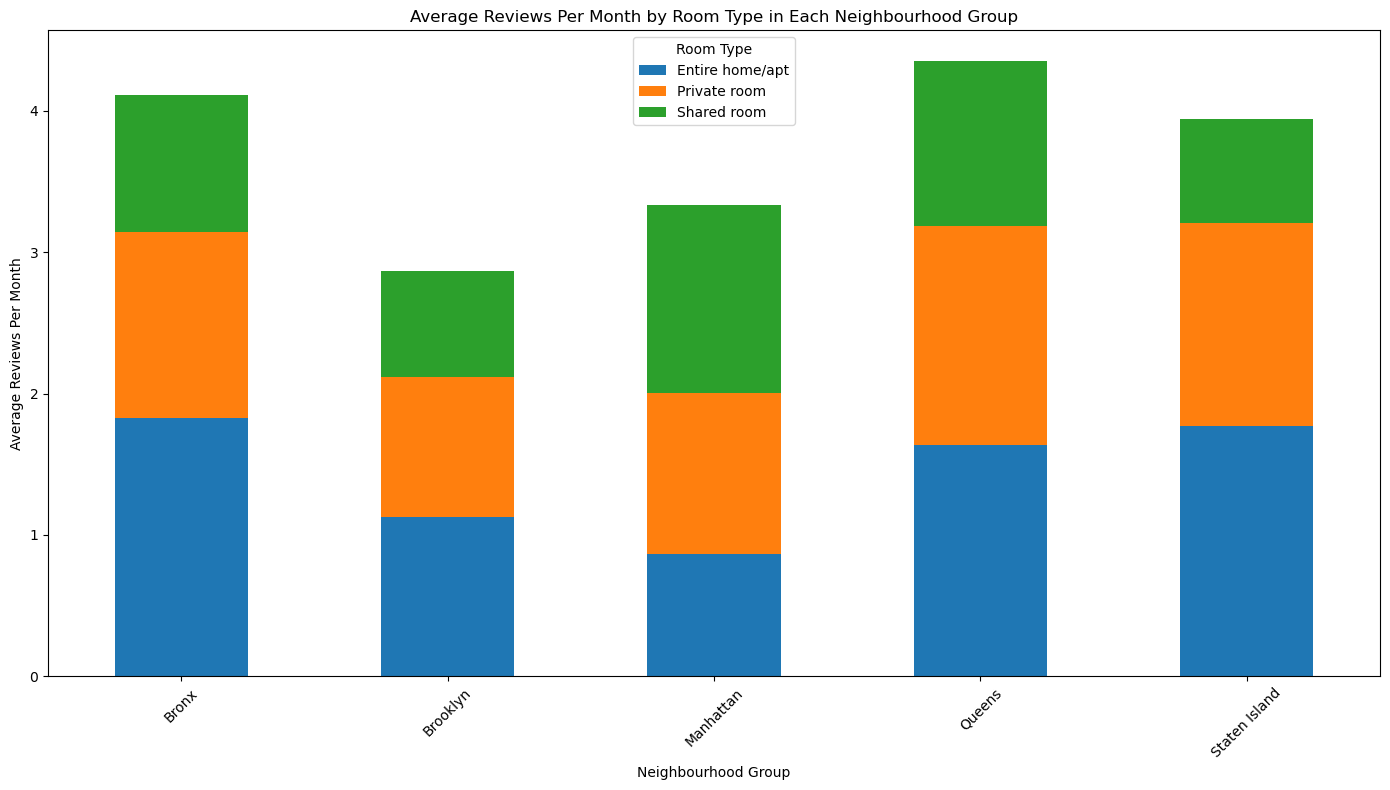

In [145]:



pivot_table = df.pivot_table(index='neighbourhood_group', columns='room_type', values='reviews_per_month', aggfunc='mean')

# Add a new column to the pivot table that sums the average reviews_per_month across room types
pivot_table['Total Average'] = pivot_table.sum(axis=1)

# Display the pivot table with the additional column
print(pivot_table)

plot_data = pivot_table.drop(columns='Total Average')

# Plotting
plot_data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Average Reviews Per Month by Room Type in Each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Reviews Per Month')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


Based on the stacked bar chart showing the average reviews per month by room type in each neighborhood group,we can observe
 Finding the average (mean) for comparing the central tendency of reviews_per_month across different neighbourhood groups helps in understanding which room_type in each group around New York City generally receives more or less reviews per month.

- > Queens in NYC recevied the highest average reviews per month across all room types

- > Bronx shows the lowest average reviews per month, which may suggest either lower guest engagement or fewer bookings relative to other neighborhoods.

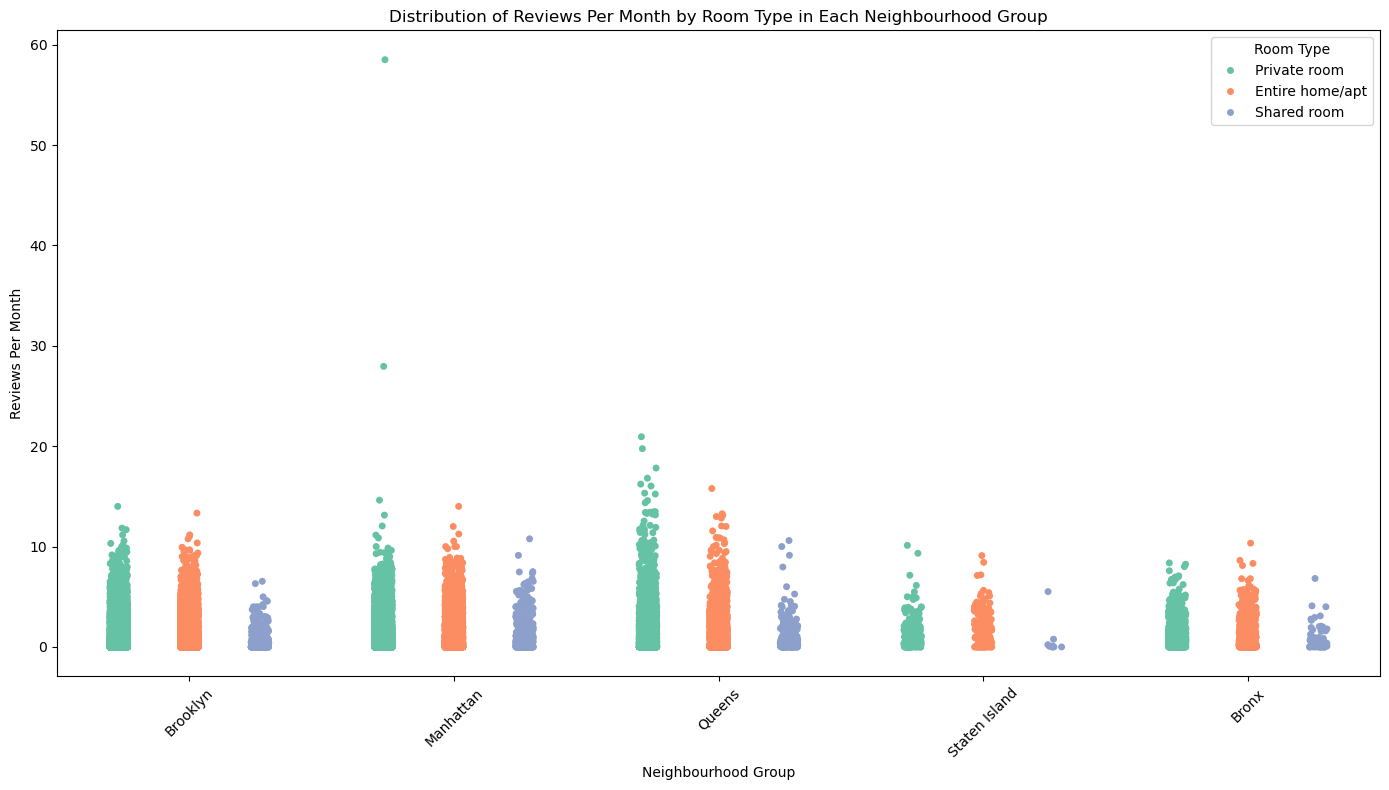

In [146]:
plt.figure(figsize=(14, 8))
sns.stripplot(x='neighbourhood_group', y='reviews_per_month', hue='room_type', data=df, palette='Set2', jitter=True, dodge=True)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Reviews Per Month')
plt.title('Distribution of Reviews Per Month by Room Type in Each Neighbourhood Group')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()

plt.show()

- Private rooms (green) and entire homes/apartments (orange) in general has received higher review counts compared to shared rooms across all neighbourhoods.

- While most listings have a moderate number of reviews,there are two data points in Manhattan's private room category that stands out as outlier.

- In areas like Staten Island and the Bronx where overall reviews per month is on a lower end, the airbnb hosts could consider ways to increase visibility, enhance the overall guest experiences to boost review counts.


### **Key Points for Stakeholders**


- Hosts and Property Managers can utilize the above findings to improve their property listing price and availability as well as improvise the strategy for keeping pace with the market trends. Understanding which room types and neighborhoods are in greater demand enables them to optimize occupancy rates and increase revenue.

- New Investors: From the findings can leverage to pinpoint high-return areas such as Manhattan and Brooklyn or explore more affordable markets like the Bronx to cater to different customer segments.

- Marketing and Sales Teams: Derieved data on the popularity of different room types and average review for them can be helpful for them in their marketing efforts, they can promote particular listings or enhancing guest engagement in neighborhoods with lower performance.

- Product Development Teams: Can utilize the data to develop features that support hosts in improving their listings based on popular areas and room types. They can also design tools/products which can help attract more number of guests in regions with lesse popularity.